# FAKE NEWS PROJECT

Loading modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

Loading the Dataset

In [2]:
fake=pd.read_csv("Fake.tsv",sep="\t",low_memory=False)

In [3]:
fake.head()

,title,text,subject,date,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171
0,Donald Trump Sends Out Embarrassing New Yearâ...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Trump Is So Obsessed He Even Has Obamaâ€™s Na...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In Fake news dataset Unnamed 4 to Unnamed 171 columns are nan so we have to drop these columns.

In [4]:
fake2=fake.drop(["Unnamed: 4","Unnamed: 5","Unnamed: 6","Unnamed: 7","Unnamed: 8","Unnamed: 9","Unnamed: 10","Unnamed: 11"
                ,"Unnamed: 12","Unnamed: 13","Unnamed: 14","Unnamed: 15","Unnamed: 16","Unnamed: 17","Unnamed: 18","Unnamed: 19",
                "Unnamed: 20","Unnamed: 21","Unnamed: 22","Unnamed: 23","Unnamed: 24","Unnamed: 25","Unnamed: 26","Unnamed: 27",
                "Unnamed: 28","Unnamed: 29","Unnamed: 30","Unnamed: 31","Unnamed: 32","Unnamed: 33","Unnamed: 34","Unnamed: 35","Unnamed: 36",
                "Unnamed: 37","Unnamed: 38","Unnamed: 39","Unnamed: 40","Unnamed: 41","Unnamed: 42","Unnamed: 43","Unnamed: 44","Unnamed: 45",
                "Unnamed: 46","Unnamed: 47","Unnamed: 48","Unnamed: 49","Unnamed: 50","Unnamed: 51","Unnamed: 52","Unnamed: 53","Unnamed: 54",
                "Unnamed: 55",'Unnamed: 56','Unnamed: 57',"Unnamed: 58","Unnamed: 59","Unnamed: 60","Unnamed: 61","Unnamed: 62","Unnamed: 63",
                "Unnamed: 64","Unnamed: 65","Unnamed: 66","Unnamed: 67","Unnamed: 68","Unnamed: 69","Unnamed: 70","Unnamed: 71","Unnamed: 72",
                "Unnamed: 73","Unnamed: 74","Unnamed: 75","Unnamed: 76","Unnamed: 77","Unnamed: 78","Unnamed: 79","Unnamed: 80","Unnamed: 81",
                "Unnamed: 82","Unnamed: 83","Unnamed: 84","Unnamed: 85","Unnamed: 86","Unnamed: 87","Unnamed: 88","Unnamed: 89","Unnamed: 90",
                "Unnamed: 91","Unnamed: 92","Unnamed: 93","Unnamed: 94","Unnamed: 95","Unnamed: 96","Unnamed: 97","Unnamed: 98","Unnamed: 99",
                "Unnamed: 100","Unnamed: 101","Unnamed: 102","Unnamed: 103","Unnamed: 104","Unnamed: 105","Unnamed: 106","Unnamed: 107","Unnamed: 108",
                "Unnamed: 109","Unnamed: 110","Unnamed: 111","Unnamed: 112","Unnamed: 113","Unnamed: 114","Unnamed: 115","Unnamed: 116","Unnamed: 117","Unnamed: 118",
                "Unnamed: 119","Unnamed: 120","Unnamed: 121","Unnamed: 122","Unnamed: 123","Unnamed: 124","Unnamed: 125","Unnamed: 126","Unnamed: 127",
                "Unnamed: 128","Unnamed: 129","Unnamed: 130","Unnamed: 131","Unnamed: 132","Unnamed: 133","Unnamed: 134","Unnamed: 135","Unnamed: 136",
                "Unnamed: 137","Unnamed: 138","Unnamed: 139","Unnamed: 140","Unnamed: 141","Unnamed: 142","Unnamed: 143","Unnamed: 144","Unnamed: 145",
                "Unnamed: 146","Unnamed: 147","Unnamed: 148","Unnamed: 149","Unnamed: 150","Unnamed: 151","Unnamed: 152","Unnamed: 153","Unnamed: 154",
                "Unnamed: 155","Unnamed: 156","Unnamed: 157","Unnamed: 158","Unnamed: 159","Unnamed: 160","Unnamed: 161","Unnamed: 162",
                "Unnamed: 163","Unnamed: 164","Unnamed: 165","Unnamed: 166","Unnamed: 167","Unnamed: 168","Unnamed: 169","Unnamed: 170",
                "Unnamed: 171"],axis=1)

In [5]:
fake2.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Yearâ...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obamaâ€™s Na...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
true=pd.read_csv("True.tsv", sep="\t")

In [7]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


First Five rows of True news.

# Data cleaning and preparation

In [8]:
# Adding a new column in both dataset.
fake2['target'] ='fake'
true['target'] = 'true'

There is no target column so creating new column which is target.

In [10]:
# Concatenate dataframes
news =pd.concat([fake2, true]).reset_index(drop = True)
news.shape

(44919, 5)

Concatenating both dataset

In [16]:
# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(news)
data = data.reset_index(drop=True)

In [17]:
data.head()

,title,text,subject,date,target
0,Watch: Paralyzed Veterans Stand for National A...,The message that we re all hoping to send is ...,politics,"Sep 25, 2017",fake
1,Families of Japanese abducted by North Korea m...,TOKYO (Reuters) - Family members of Japanese a...,politicsNews,"November 6, 2017",true
2,(VIDEO) UN CLIMATE CHANGE FREAKS: â€œWe should...,What an evil bunch of freaks! The agenda is so...,Government News,"Apr 6, 2015",fake
3,Merkel and the refugees: How German leader eme...,BERLIN (Reuters) - Near the end of a recent ca...,worldnews,"September 10, 2017",true
4,Trump likely to nominate former Senate aide Pe...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"June 16, 2017",true


In [18]:
data.shape

(44919, 5)

data has 44919 rows and 5 columns.

In [19]:
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,Watch: Paralyzed Veterans Stand for National A...,The message that we re all hoping to send is ...,politics,fake
1,Families of Japanese abducted by North Korea m...,TOKYO (Reuters) - Family members of Japanese a...,politicsNews,true
2,(VIDEO) UN CLIMATE CHANGE FREAKS: â€œWe should...,What an evil bunch of freaks! The agenda is so...,Government News,fake
3,Merkel and the refugees: How German leader eme...,BERLIN (Reuters) - Near the end of a recent ca...,worldnews,true
4,Trump likely to nominate former Senate aide Pe...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,true


Dropping date column because we will not use it for the analysis.

In [20]:
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,The message that we re all hoping to send is ...,politics,fake
1,TOKYO (Reuters) - Family members of Japanese a...,politicsNews,true
2,What an evil bunch of freaks! The agenda is so...,Government News,fake
3,BERLIN (Reuters) - Near the end of a recent ca...,worldnews,true
4,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,true


Dropping title column because we will use only the text column.

In [21]:
data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,the message that we re all hoping to send is ...,politics,fake
1,tokyo (reuters) - family members of japanese a...,politicsNews,true
2,what an evil bunch of freaks! the agenda is so...,Government News,fake
3,berlin (reuters) - near the end of a recent ca...,worldnews,true
4,washington (reuters) - u.s. president donald t...,politicsNews,true


converting all text into lowercase.

In [22]:
import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

Removing punctuation.

In [23]:
data.head()

,text,subject,target
0,the message that we re all hoping to send is ...,politics,fake
1,tokyo reuters family members of japanese abdu...,politicsNews,true
2,what an evil bunch of freaks the agenda is so ...,Government News,fake
3,berlin reuters near the end of a recent campa...,worldnews,true
4,washington reuters us president donald trump ...,politicsNews,true


Punctuation has been removed.

In [24]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


Removing Stopwords.

In [25]:
data.head()

,text,subject,target
0,message hoping send standing national anthem n...,politics,fake
1,tokyo reuters family members japanese abducted...,politicsNews,true
2,evil bunch freaks agenda important see forest ...,Government News,fake
3,berlin reuters near end recent campaign speech...,worldnews,true
4,washington reuters us president donald trump l...,politicsNews,true


Stopwords has been removed.

# Basic data exploration 

In [29]:
data["subject"].value_counts()

politicsNews                                                                                                                                                                                                                                                                                    11272
worldnews                                                                                                                                                                                                                                                                                       10145
News                                                                                                                                                                                                                                                                                             9050
politics                                                                                                              

politicsNews and worldnews type of news are highest.

target
fake    23502
true    21417
Name: text, dtype: int64


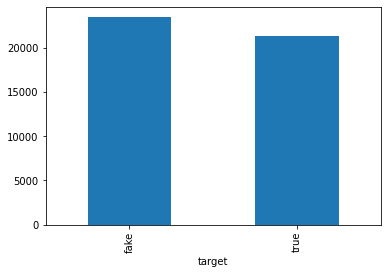

In [27]:
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

fake news are 23502 and true news are 21417.

In [32]:
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

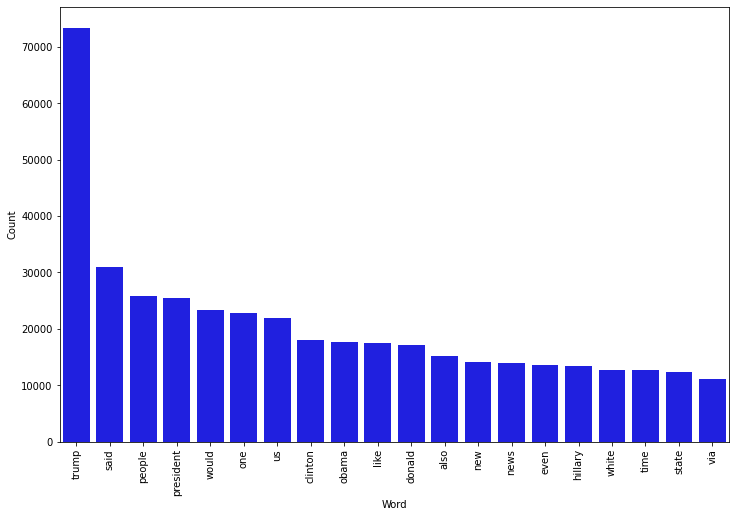

In [33]:
counter(data[data["target"] == "fake"], "text", 20)

These all are most frequent words in fake news. trump word is higly used in fake news.

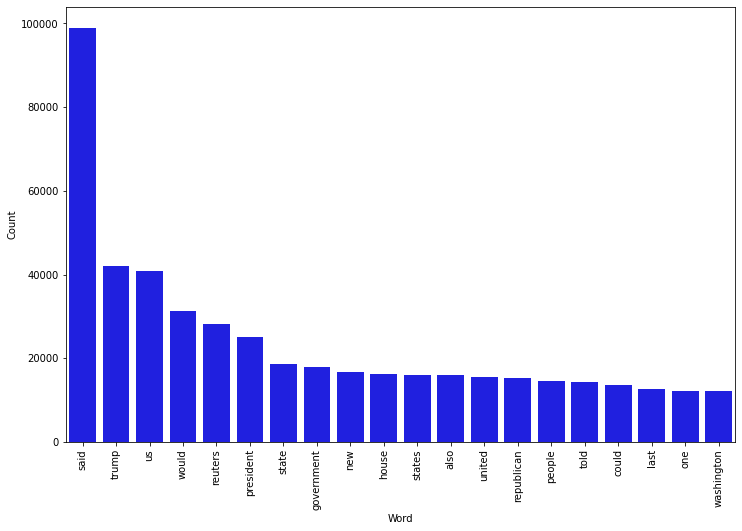

In [34]:
counter(data[data["target"] == "true"], "text", 20

These all are most frequent words in true news. said word is higly used in true news.

# Modeling

In [35]:
# Function to plot the confusion matrix
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [36]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)


Naive Bayes

In [37]:
dct = dict()

from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', NB_classifier)])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

dct['Naive Bayes'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 96.66%


# Accuracy score of NAIVE BAYES is 96.66%

Confusion matrix, without normalization


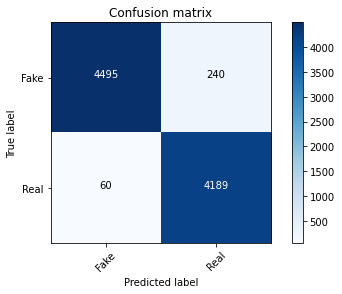

In [38]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

Logistic regression

In [39]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Logistic Regression'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 99.25%


# Accuracy score of Lgistic regression is 99.25%

Confusion matrix, without normalization


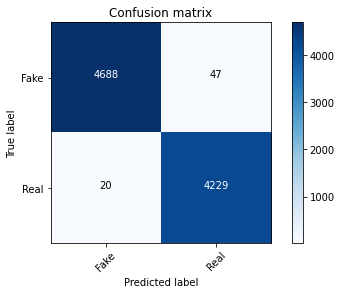

In [40]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Decision Tree'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 99.72%


# Accuracy score of Decision tree classifier is 99.72%

Confusion matrix, without normalization


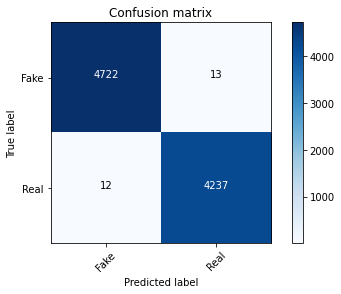

In [42]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])


Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Random Forest'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 99.28%


# Accuracy score of Random Forest classifier is 99.28%

Confusion matrix, without normalization


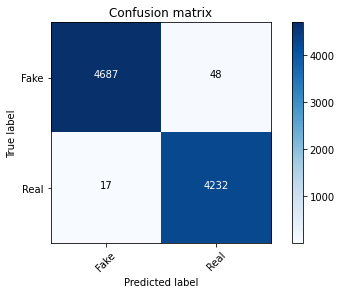

In [44]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

SVM

In [45]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', clf)])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['SVM'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 99.7%


# Accuracy Score of SVM is 99.7%

Confusion matrix, without normalization


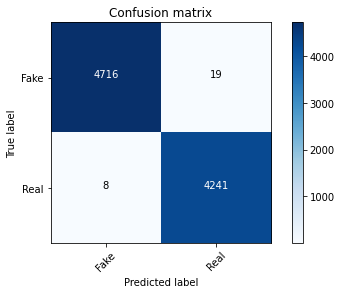

In [46]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Comparing Different Models

([<matplotlib.axis.YTick at 0x15b00a6f640>,
 [Text(0, 91, '91'),
  Text(0, 92, '92'),
  Text(0, 93, '93'),
  Text(0, 94, '94'),
  Text(0, 95, '95'),
  Text(0, 96, '96'),
  Text(0, 97, '97'),
  Text(0, 98, '98'),
  Text(0, 99, '99'),
  Text(0, 100, '100')])

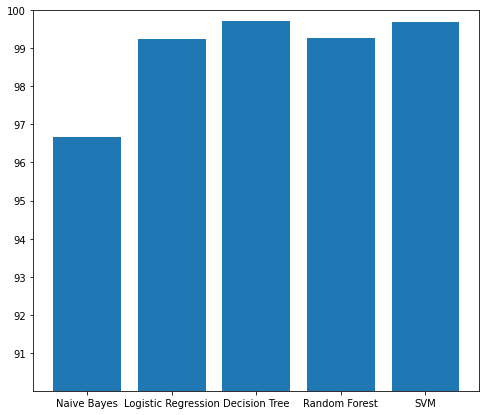

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,7))
plt.bar(list(dct.keys()),list(dct.values()))
plt.ylim(90,100)
plt.yticks((91, 92, 93, 94, 95, 96, 97, 98, 99, 100))

Decision Tree classifier and SVM Algorithms are working well.